In [1]:
import numpy as np
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#import tensorflow as tf
from sklearn.metrics import r2_score

In [2]:
import pandas as pd

df=pd.read_csv('/Users/reffer/Desktop/Roby.csv',encoding='latin1')

print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#Drop uneccessary columns 
df=df.drop(['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Customer Name',
         'Country', 'Segment', 'City', 'Postal Code', 'Product ID', 'Product Name', 
         'Discount', 'Quantity', 'Order Date'], axis=1)
df

,Ship Mode,State,Region,Category,Sub-Category,Sales,Profit
0,Second Class,Kentucky,South,Furniture,Bookcases,261.9600,41.9136
1,Second Class,Kentucky,South,Furniture,Chairs,731.9400,219.5820
2,Second Class,California,West,Office Supplies,Labels,14.6200,6.8714
3,Standard Class,Florida,South,Furniture,Tables,957.5775,-383.0310
4,Standard Class,Florida,South,Office Supplies,Storage,22.3680,2.5164
...,...,...,...,...,...,...,...
9989,Second Class,Florida,South,Furniture,Furnishings,25.2480,4.1028
9990,Standard Class,California,West,Furniture,Furnishings,91.9600,15.6332
9991,Standard Class,California,West,Technology,Phones,258.5760,19.3932
9992,Standard Class,California,West,Office Supplies,Paper,29.6000,13.3200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   State         9994 non-null   object 
 2   Region        9994 non-null   object 
 3   Category      9994 non-null   object 
 4   Sub-Category  9994 non-null   object 
 5   Sales         9994 non-null   float64
 6   Profit        9994 non-null   float64
dtypes: float64(2), object(5)
memory usage: 546.7+ KB


In [6]:
{columns: len(df[columns].unique()) for columns in df.columns}

{'Ship Mode': 4,
 'State': 49,
 'Region': 4,
 'Category': 3,
 'Sub-Category': 17,
 'Sales': 5825,
 'Profit': 7287}

In [7]:
def onehot_encode (df, column):
    dummies = pd.get_dummies (df=[column], prefix=column)
    df = pd.concat ([df.dummies], axis =1)
    df = df.drop(column, axis=1)
    for column in ['Ship Mode', 'State', 'Region', 'Category', 'Sub-Category']:
        df = onehot_encode (df, column = column)
    return df


In [8]:
df

,Ship Mode,State,Region,Category,Sub-Category,Sales,Profit
0,Second Class,Kentucky,South,Furniture,Bookcases,261.9600,41.9136
1,Second Class,Kentucky,South,Furniture,Chairs,731.9400,219.5820
2,Second Class,California,West,Office Supplies,Labels,14.6200,6.8714
3,Standard Class,Florida,South,Furniture,Tables,957.5775,-383.0310
4,Standard Class,Florida,South,Office Supplies,Storage,22.3680,2.5164
...,...,...,...,...,...,...,...
9989,Second Class,Florida,South,Furniture,Furnishings,25.2480,4.1028
9990,Standard Class,California,West,Furniture,Furnishings,91.9600,15.6332
9991,Standard Class,California,West,Technology,Phones,258.5760,19.3932
9992,Standard Class,California,West,Office Supplies,Paper,29.6000,13.3200


In [9]:
df1 = pd.get_dummies(df, columns= ['Ship Mode'], prefix = 'Ship Mode', drop_first= True)

In [10]:
df2 = pd.get_dummies(df, columns= ['State'], prefix = 'State', drop_first= True)

In [11]:
df3 = pd.get_dummies(df, columns= ['Region'], prefix = 'Region', drop_first= True)

In [12]:
df4 = pd.get_dummies(df, columns= ['Category'], prefix = 'Category', drop_first= True)

In [13]:
df5 = pd.get_dummies(df, columns= ['Sub-Category'], prefix = 'Sub-Category', drop_first= True)

In [14]:
df1=df1.drop(['State', 'Region', 'Category', 'Sub-Category'], axis=1)
df1

,Sales,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,261.9600,41.9136,0,1,0
1,731.9400,219.5820,0,1,0
2,14.6200,6.8714,0,1,0
3,957.5775,-383.0310,0,0,1
4,22.3680,2.5164,0,0,1
...,...,...,...,...,...
9989,25.2480,4.1028,0,1,0
9990,91.9600,15.6332,0,0,1
9991,258.5760,19.3932,0,0,1
9992,29.6000,13.3200,0,0,1


In [15]:
df2=df2.drop(['Ship Mode','Region', 'Category', 'Sub-Category','Sales', 'Profit'], axis=1)
df2

,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Idaho,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9991,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df3=df3.drop(['Ship Mode','State', 'Category', 'Sub-Category', 'Sales', 'Profit'], axis=1)
df3

,Region_East,Region_South,Region_West
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
9989,0,1,0
9990,0,0,1
9991,0,0,1
9992,0,0,1


In [17]:
df4=df4.drop(['Ship Mode','State', 'Region', 'Sub-Category','Sales', 'Profit'], axis=1)
df4

,Category_Office Supplies,Category_Technology
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
9989,0,0
9990,0,0
9991,0,1
9992,1,0


In [18]:
df5=df5.drop(['Ship Mode','State', 'Region', 'Category', 'Sales', 'Profit'], axis=1)
df5

,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9990,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9991,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9992,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
df_dummies=pd.concat([df1, df2, df3, df4, df5], axis =1)
df_dummies

,Sales,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,41.9136,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,731.9400,219.5820,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.6200,6.8714,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,957.5775,-383.0310,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22.3680,2.5164,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,4.1028,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9990,91.9600,15.6332,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9991,258.5760,19.3932,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9992,29.6000,13.3200,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
#Split df into x and y
y = df_dummies ['Sales']
X = df_dummies.drop ('Sales', axis =1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

In [22]:
#import LinearRegression
from sklearn.linear_model import LinearRegression
#import os,sys
#from scipy import stats



In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
#intercept
print(lm.intercept_)


322.8120888382433


In [26]:
#Coefficient
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Profit,1.215502
Ship Mode_Same Day,13.803572
Ship Mode_Second Class,26.638034
Ship Mode_Standard Class,14.570752
State_Arizona,2.177226
...,...
Sub-Category_Paper,-99.130923
Sub-Category_Phones,139.018877
Sub-Category_Storage,108.808710
Sub-Category_Supplies,147.784308


In [27]:
#predict test
pred = lm.predict(X_test)
pred

array([ 678.98078438,  282.89796133,    9.19167485, ..., 1595.55882853,
         87.27808902,  186.18547483])

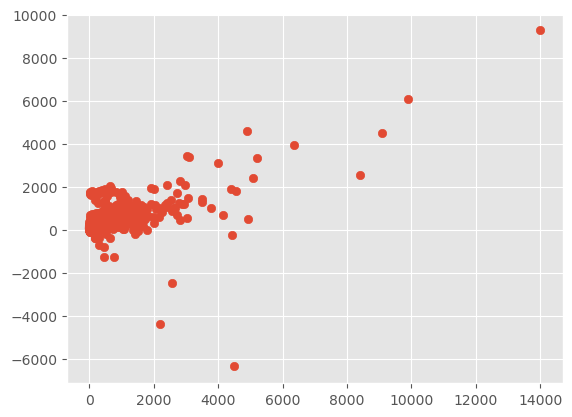

In [28]:
#scatter plot
plt.scatter(y_test,pred)

In [29]:
#add constant to predictor variables
import statsmodels.api as sm
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     90.66
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:51:08   Log-Likelihood:                -76077.
No. Observations:                9994   AIC:                         1.523e+05
Df Residuals:                    9925   BIC:                         1.528e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [30]:
df_dummies

,Sales,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,41.9136,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,731.9400,219.5820,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.6200,6.8714,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,957.5775,-383.0310,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22.3680,2.5164,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,4.1028,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9990,91.9600,15.6332,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9991,258.5760,19.3932,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9992,29.6000,13.3200,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
df_dummies2=df_dummies.drop(['Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'State_Arizona', 'State_Arkansas',
                             'State_California', 'State_Colorado', 'State_Connecticut','State_Delaware', 'State_District of Columbia', 
                             'State_Florida','State_Georgia', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
                             'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan',
                             'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 
                             'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina',  
                             'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island',
                             'State_South Carolina', 'State_South Dakota', 'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Vermont',
                             'State_Virginia', 'State_Washington', 'State_West Virginia', 'State_Wisconsin', 'State_Wyoming', 'Region_East',
                             'Region_South', 'Region_West', 'Sub-Category_Binders', 'Sub-Category_Envelopes'], axis=1)

In [32]:
df_dummies2

,Sales,Profit,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,41.9136,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,731.9400,219.5820,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,14.6200,6.8714,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,957.5775,-383.0310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,22.3680,2.5164,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,4.1028,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9990,91.9600,15.6332,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9991,258.5760,19.3932,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9992,29.6000,13.3200,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [33]:
#Split df into x and y
y = df_dummies2 ['Sales']
X = df_dummies2.drop ('Sales', axis =1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [35]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
#intercept
print(lm.intercept_)


342.6931077838419


In [39]:
#Coefficient
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Profit,1.096121
Category_Office Supplies,-236.255870
Category_Technology,-187.602105
Sub-Category_Appliances,83.714517
Sub-Category_Art,-83.214772
Sub-Category_Bookcases,164.887966
Sub-Category_Chairs,148.881585
Sub-Category_Copiers,1140.395653
Sub-Category_Fasteners,-97.537137
Sub-Category_Furnishings,-262.843773


In [40]:
#predict test
pred = lm.predict(X_test)
pred

array([706.30082566, 248.40136482,  30.52087593, ...,  52.04755624,
        26.35035572,  92.54241315])

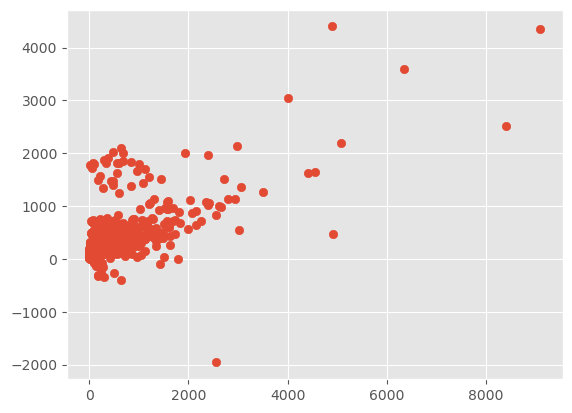

In [41]:
#scatter plot
plt.scatter(y_test,pred)

In [42]:
#add constant to predictor variables
import statsmodels.api as sm
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     382.7
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:51:09   Log-Likelihood:                -76100.
No. Observations:                9994   AIC:                         1.522e+05
Df Residuals:                    9977   BIC:                         1.524e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/var/folders/17/br7lhr0d49z5kcbl73nl58vh0000gn/T/ipykernel_44407/416555715.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


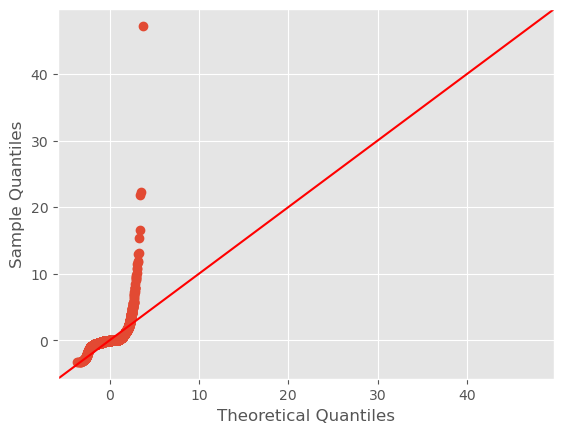

In [43]:
#create the baseline model, using statsmodel
import scipy.stats as stats
import statsmodels as sm
import statsmodels.api as sm


residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


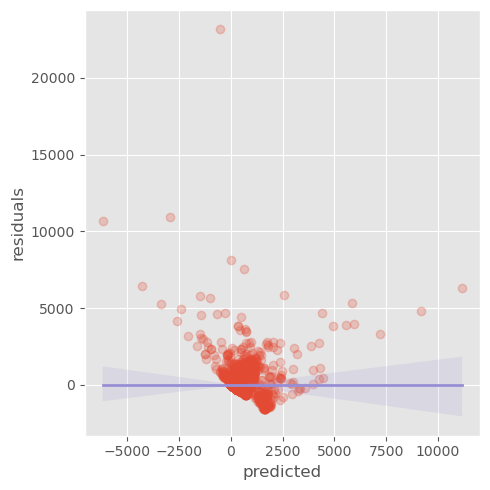

In [44]:
#Homoscedasticity
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(model.fittedvalues,model.resid, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
plt.tight_layout()
plt.show()


In [45]:
#Database predictor
data_pred = df_dummies2.iloc[:,1:18]
data_pred.head()

,Profit,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,41.9136,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,219.5820,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,6.8714,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-383.0310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2.5164,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
#correlation
data_pred.corr()

,Profit,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
Profit,1.000000,-0.043822,0.101825,0.009692,-0.025690,-0.028627,0.015811,0.278873,-0.015443,-0.020853,-0.011138,0.000357,-0.006466,0.028569,-0.004550,-0.020750,-0.065286
Category_Office Supplies,-0.043822,1.000000,-0.586764,0.179458,0.238716,-0.188295,-0.316111,-0.101999,0.120892,-0.401026,0.157764,-0.132960,0.323428,-0.385070,0.246771,0.112966,-0.223768
Category_Technology,0.101825,-0.586764,1.000000,-0.105300,-0.140070,-0.072752,-0.122136,0.173833,-0.070935,-0.154945,-0.092570,0.226599,-0.189776,0.656261,-0.144796,-0.066284,-0.086458
Sub-Category_Appliances,0.009692,0.179458,-0.105300,1.000000,-0.065058,-0.033791,-0.056729,-0.018305,-0.032947,-0.071967,-0.042996,-0.023861,-0.088145,-0.069104,-0.067253,-0.030787,-0.040157
Sub-Category_Art,-0.025690,0.238716,-0.140070,-0.065058,1.000000,-0.044949,-0.075461,-0.024349,-0.043827,-0.095731,-0.057194,-0.031740,-0.117251,-0.091922,-0.089461,-0.040953,-0.053417
Sub-Category_Bookcases,-0.028627,-0.188295,-0.072752,-0.033791,-0.044949,1.000000,-0.039194,-0.012647,-0.022763,-0.049722,-0.029706,-0.016485,-0.060900,-0.047744,-0.046466,-0.021271,-0.027745
Sub-Category_Chairs,0.015811,-0.316111,-0.122136,-0.056729,-0.075461,-0.039194,1.000000,-0.021231,-0.038215,-0.083475,-0.049871,-0.027676,-0.102239,-0.080153,-0.078007,-0.035710,-0.046578
Sub-Category_Copiers,0.278873,-0.101999,0.173833,-0.018305,-0.024349,-0.012647,-0.021231,1.000000,-0.012331,-0.026935,-0.016092,-0.008930,-0.032989,-0.025863,-0.025170,-0.011522,-0.015029
Sub-Category_Fasteners,-0.015443,0.120892,-0.070935,-0.032947,-0.043827,-0.022763,-0.038215,-0.012331,1.000000,-0.048481,-0.028964,-0.016074,-0.059379,-0.046552,-0.045305,-0.020740,-0.027052
Sub-Category_Furnishings,-0.020853,-0.401026,-0.154945,-0.071967,-0.095731,-0.049722,-0.083475,-0.026935,-0.048481,1.000000,-0.063268,-0.035110,-0.129703,-0.101684,-0.098961,-0.045302,-0.059090


In [47]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Profit                    9994 non-null   float64
 1   Category_Office Supplies  9994 non-null   uint8  
 2   Category_Technology       9994 non-null   uint8  
 3   Sub-Category_Appliances   9994 non-null   uint8  
 4   Sub-Category_Art          9994 non-null   uint8  
 5   Sub-Category_Bookcases    9994 non-null   uint8  
 6   Sub-Category_Chairs       9994 non-null   uint8  
 7   Sub-Category_Copiers      9994 non-null   uint8  
 8   Sub-Category_Fasteners    9994 non-null   uint8  
 9   Sub-Category_Furnishings  9994 non-null   uint8  
 10  Sub-Category_Labels       9994 non-null   uint8  
 11  Sub-Category_Machines     9994 non-null   uint8  
 12  Sub-Category_Paper        9994 non-null   uint8  
 13  Sub-Category_Phones       9994 non-null   uint8  
 14  Sub-Cate

In [48]:
abs(data_pred.corr()) > 0.75

,Profit,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
Profit,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Category_Office Supplies,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Category_Technology,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Sub-Category_Appliances,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Sub-Category_Art,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Sub-Category_Bookcases,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Sub-Category_Chairs,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Sub-Category_Copiers,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Sub-Category_Fasteners,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
Sub-Category_Furnishings,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [49]:
#Checking how much are correlated the variables
data=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data['pairs'] = list(zip(data.level_0, data.level_1))
data.set_index(['pairs'], inplace = True)
data.drop(columns=['level_1', 'level_0'], inplace = True)
data.columns = ['cc']
data.drop_duplicates(inplace=True)
data

,cc
pairs,
"(Profit, Profit)",1.000000
"(Sub-Category_Phones, Category_Technology)",0.656261
"(Category_Office Supplies, Category_Technology)",0.586764
"(Sub-Category_Furnishings, Category_Office Supplies)",0.401026
"(Sub-Category_Phones, Category_Office Supplies)",0.385070
...,...
"(Sub-Category_Appliances, Profit)",0.009692
"(Sub-Category_Copiers, Sub-Category_Machines)",0.008930
"(Profit, Sub-Category_Paper)",0.006466


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

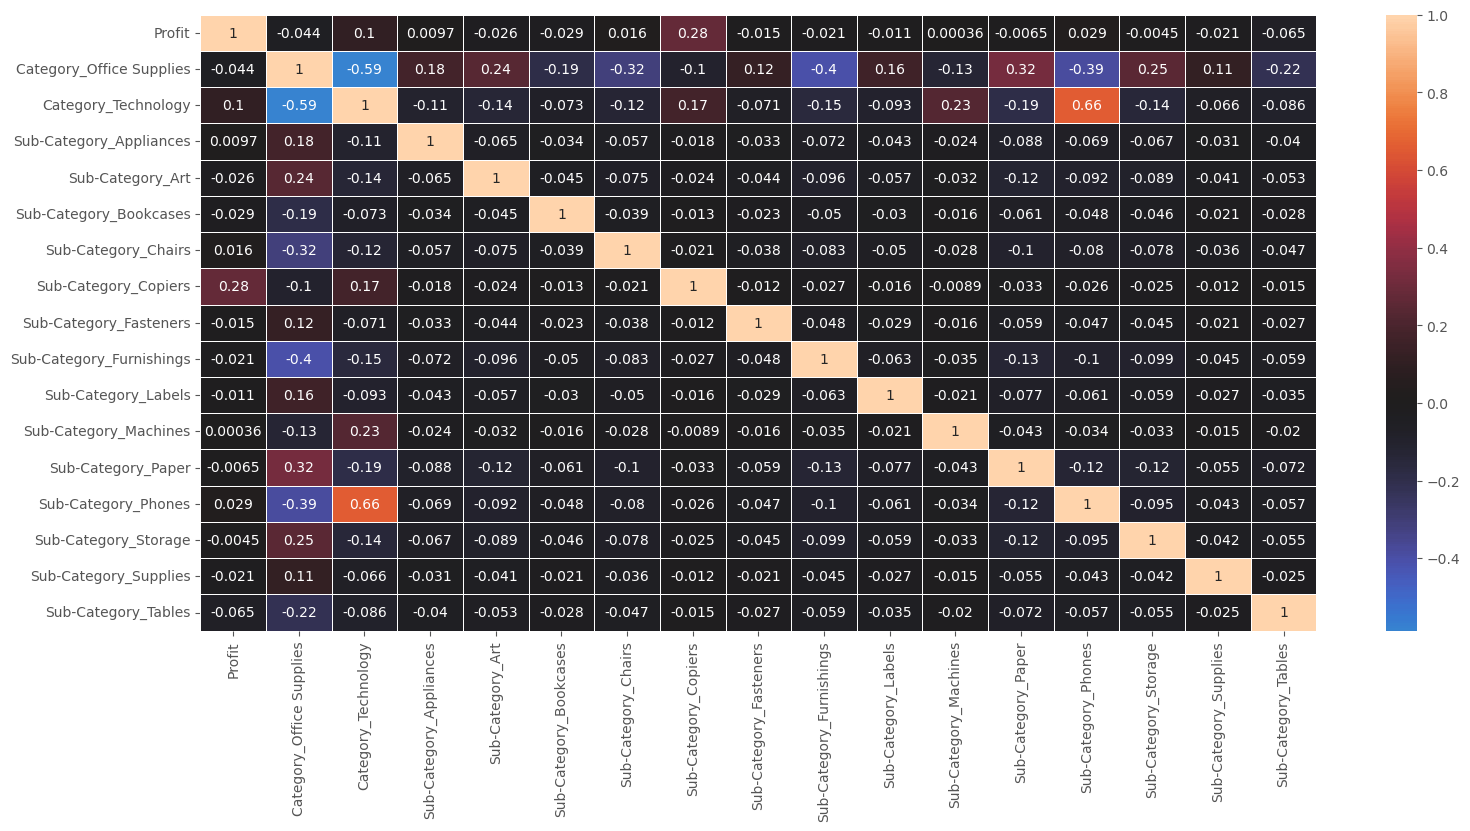

In [50]:
#correlation plot
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(data=data_pred.corr(), linewidths=0.5, center=0, annot=True, ax=ax)
sns.heatmap

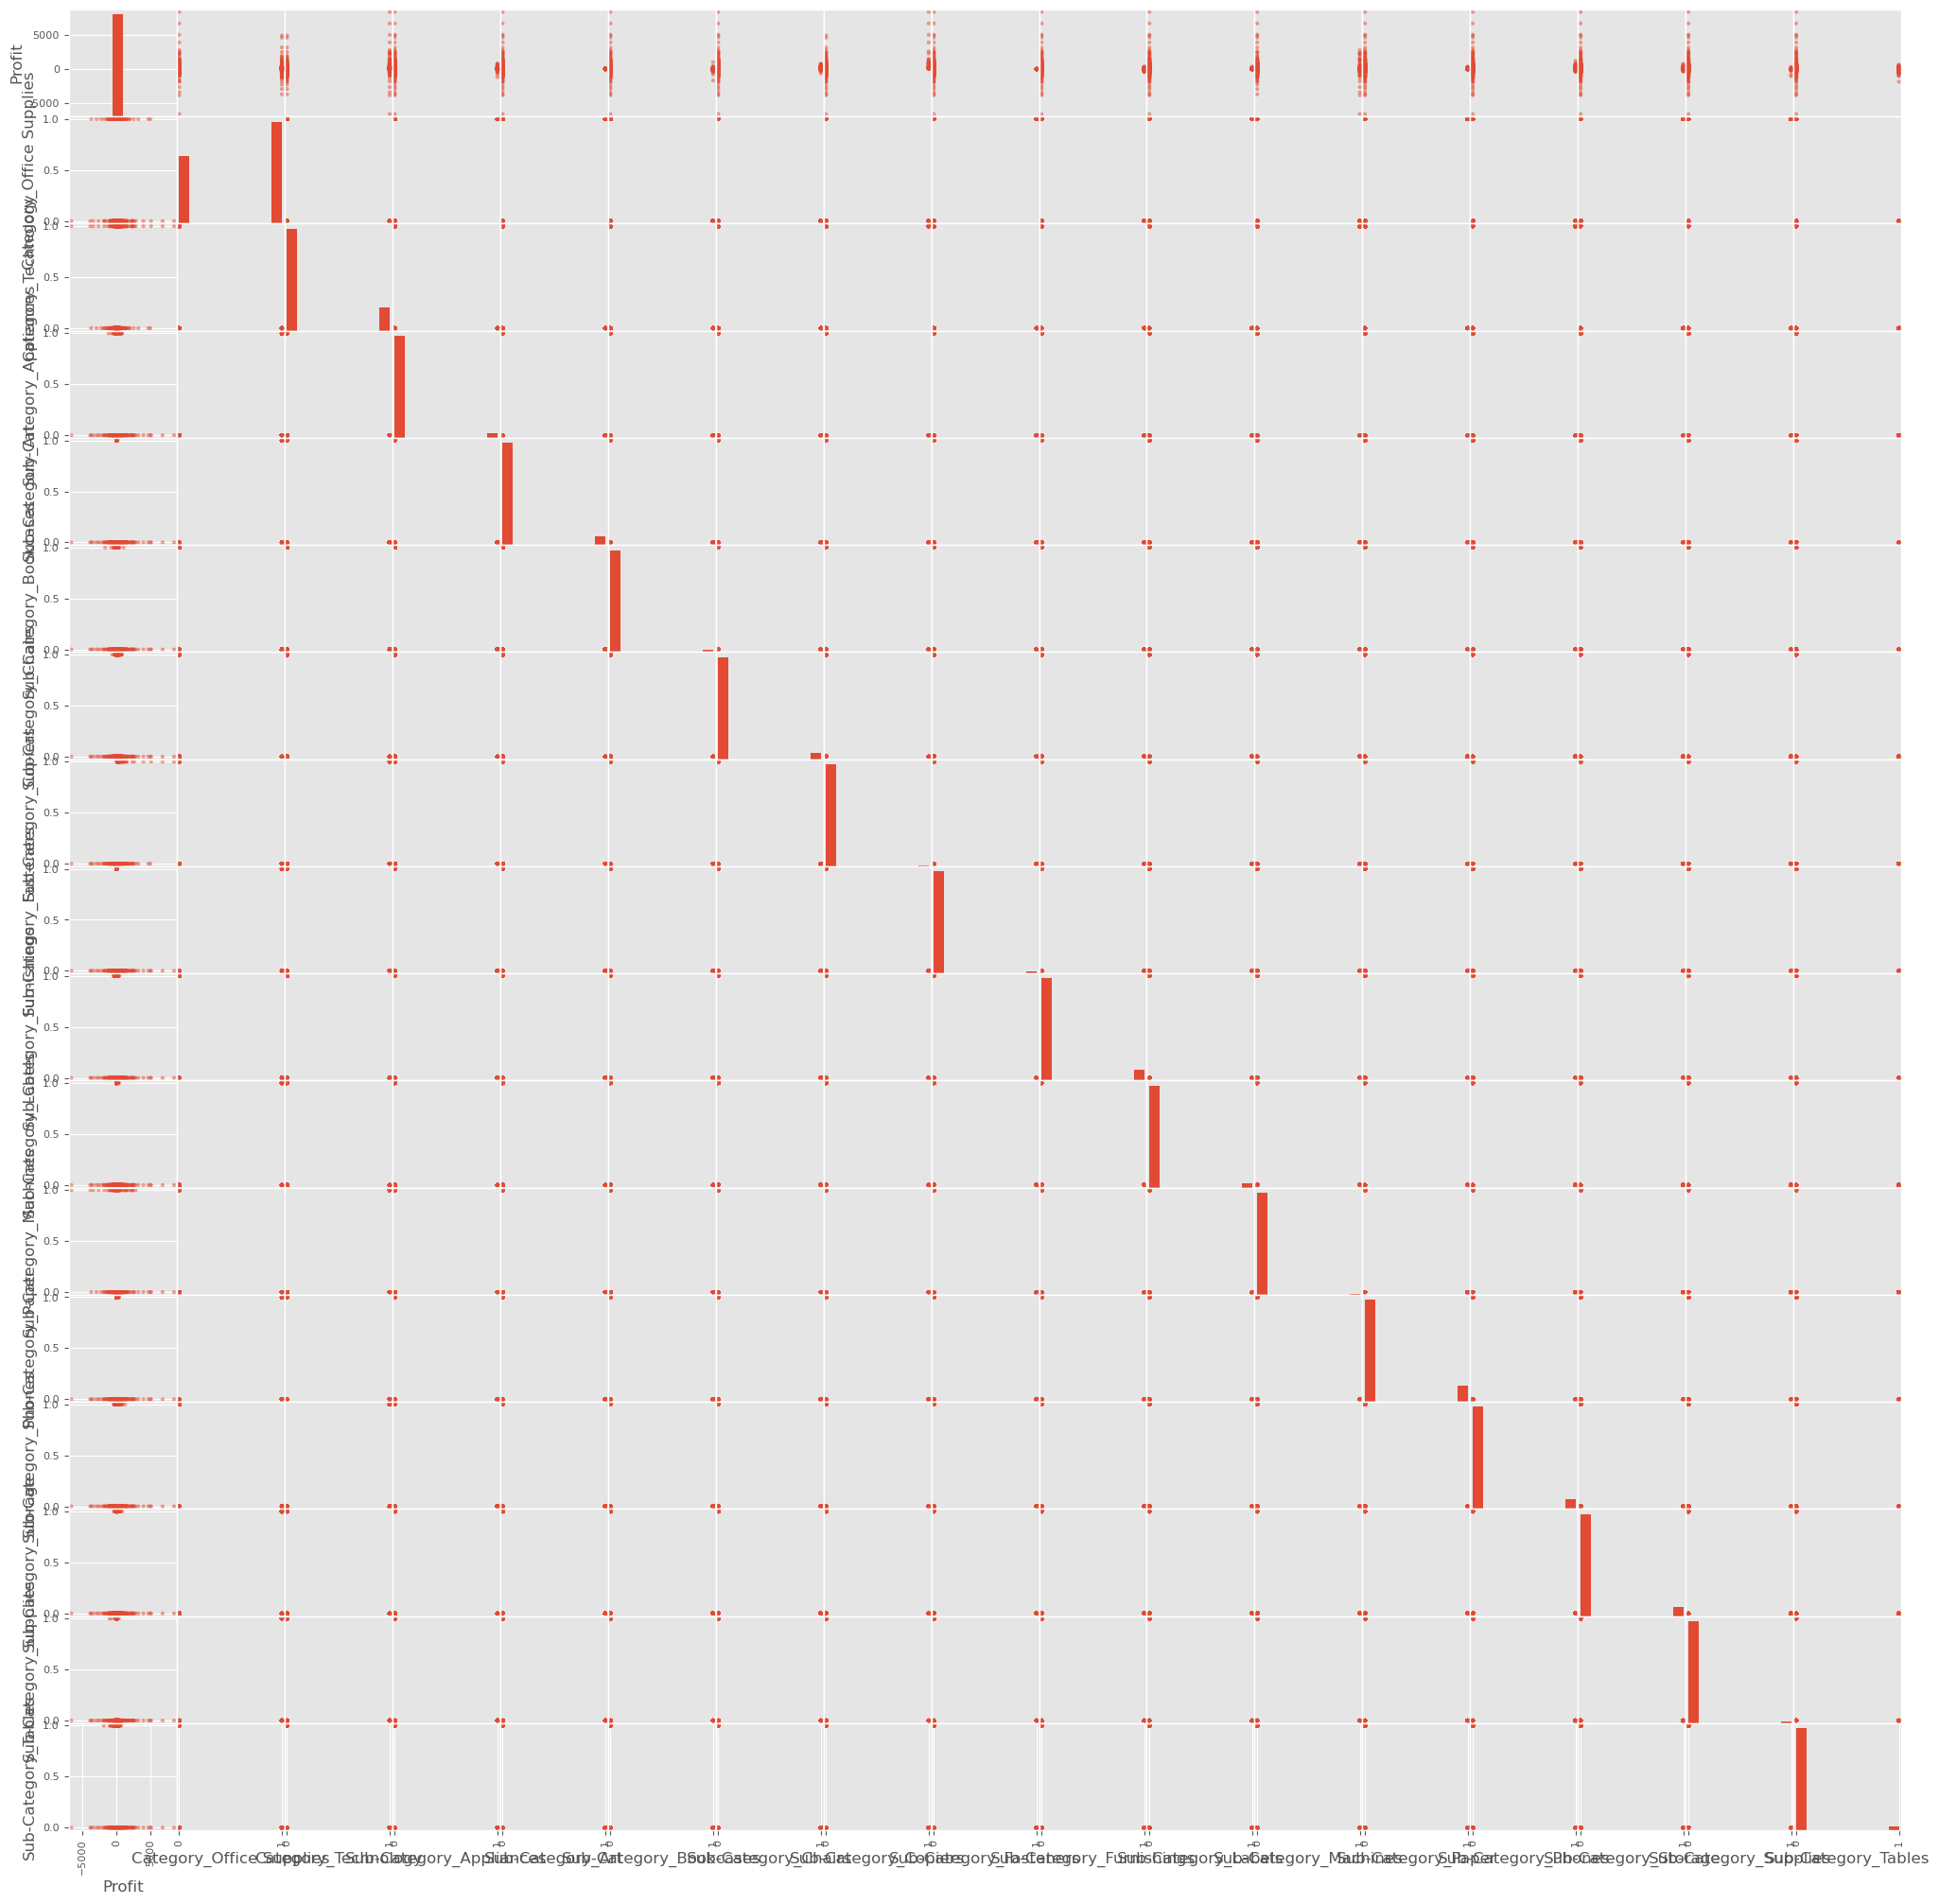

In [51]:
#scatter plot data prediction
pd.plotting.scatter_matrix(data_pred,figsize  = [25, 25]);
plt.show()

/var/folders/17/br7lhr0d49z5kcbl73nl58vh0000gn/T/ipykernel_44407/185468548.py:3: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


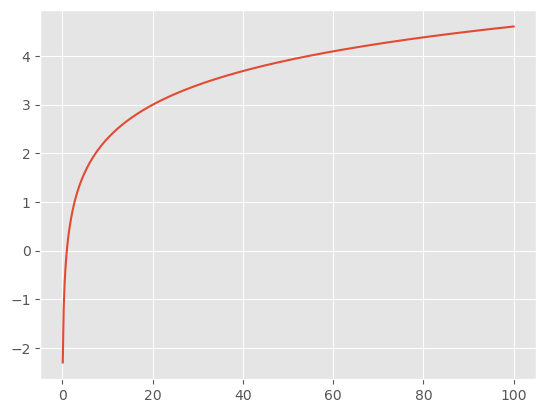

In [52]:
#Natural logarithm
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)
plt.plot(x, y);

In [79]:
#importing data 

df_dummies2

,Sales,Profit,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,41.9136,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,731.9400,219.5820,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,14.6200,6.8714,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,957.5775,-383.0310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,22.3680,2.5164,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,4.1028,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9990,91.9600,15.6332,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9991,258.5760,19.3932,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9992,29.6000,13.3200,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


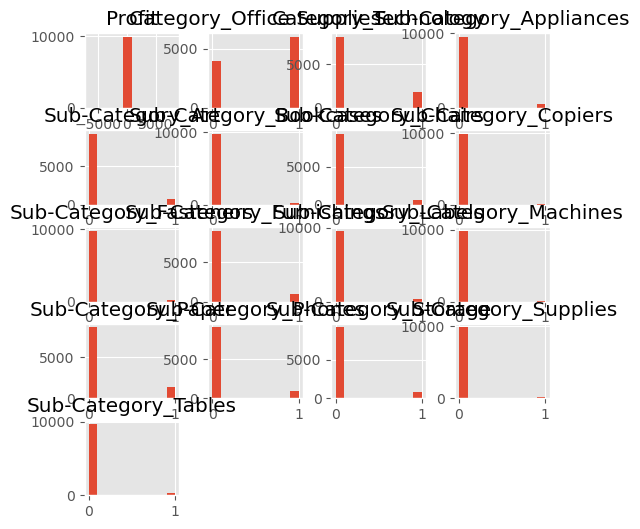

In [80]:
#plot with sqft_living', 'grade', 'sqft_living15', 'price'
data_pred[['Profit', 'Category_Office Supplies', 'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art',
           'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Fasteners',
           'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper', 
           'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables']].hist(figsize  = [6, 6]);

In [86]:
#log function
data_log = pd.DataFrame([])
data_log['logsup'] = np.log(data_pred['Category_Office Supplies'])
data_log['logtec'] = np.log(data_pred['Category_Technology'])
data_log['logapp'] = np.log(data_pred['Sub-Category_Appliances'])
data_log['logpro'] = np.log(data_pred['Profit'])
data_log.hist(figsize  = [100, 100]);

/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 0.0] is not finite

In [ ]:
#plot with sqft_living', 'grade', 'sqft_living15', 'price'
data_pred[['Profit', 'Category_Office Supplies', 'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art',
           'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Fasteners',
           'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper', 
           'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables']].hist(figsize  = [6, 6]);

In [ ]:
#log function
data_log = pd.DataFrame([])
data_log['logliv'] = np.log(data_pred['sqft_living'])
data_log['loggra'] = np.log(data_pred['grade'])
data_log['logl15'] = np.log(data_pred['sqft_living15'])
data_log['logpri'] = np.log(data_pred['price'])
data_log.hist(figsize  = [6, 6]);

In [ ]:
outcome = 'price'
predictor = 'sqft_living'
formula = outcome + '~' + predictor
model = ols(formula=formula, data=data).fit()
model.summary()

In [ ]:
data['logliv'] = np.log(data['sqft_living'])
outcome = 'price'
predictor = 'logliv'
formula = outcome + '~' + predictor
model = ols(formula=formula, data=data).fit()
model.summary()

In [ ]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()
